In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')



In [2]:
df=pd.read_csv('vehicle_performance.csv')
df

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024


In [3]:
df[df['horsepower']=='?'].shape
df['horsepower'].replace('?',np.nan,inplace=True)
df['horsepower']=df['horsepower'].astype('float')
df['horsepower']

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

In [4]:
df.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             6
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [5]:
df['horsepower'].fillna(df['horsepower'].mean(),inplace=True)

In [6]:
df['horsepower'].isnull().sum()

np.int64(0)

In [7]:
#model building
#indep and dep features
x=df.drop(['name','Kilometer_per_liter'],axis=1)
y=df['Kilometer_per_liter']
x

,origin,cylinders,displacement,horsepower,weight,acceleration,year
0,1,8,307.0,130.0,3504,12.0,1970
1,1,8,350.0,165.0,3693,11.5,1970
2,1,8,318.0,150.0,3436,11.0,1970
3,1,8,304.0,150.0,3433,12.0,1970
4,1,8,302.0,140.0,3449,10.5,1970
...,...,...,...,...,...,...,...
393,1,4,140.0,86.0,2790,15.6,1982
394,2,4,97.0,52.0,2130,24.6,1982
395,1,4,135.0,84.0,2295,11.6,1982
396,1,4,120.0,79.0,2625,18.6,1982


In [8]:
from sklearn.model_selection import train_test_split


In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [10]:
x_train.shape


(318, 7)

In [11]:
y_train.shape


(318,)

In [12]:
x_test.shape


(80, 7)

In [13]:
y_test.shape

(80,)

In [14]:
from sklearn.linear_model import SGDRegressor

In [15]:
model=SGDRegressor()

In [16]:
model.fit(x_train,y_train)

,"loss loss: str, default='squared_error'The loss function to be used. The possible values are 'squared_error','huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'The 'squared_error' refers to the ordinary least squares fit.'huber' modifies 'squared_error' to focus less on getting outlierscorrect by switching from squared to linear loss past a distance ofepsilon. 'epsilon_insensitive' ignores errors less than epsilon and islinear past that; this is the loss function used in SVR.'squared_epsilon_insensitive' is the same but becomes squared loss pasta tolerance of epsilon.More details about the losses formulas can be found in the:ref:`User Guide `.",'squared_error'
,"penalty penalty: {'l2', 'l1', 'elasticnet', None}, default='l2'The penalty (aka regularization term) to be used. Defaults to 'l2'which is the standard regularizer for linear SVM models. 'l1' and'elasticnet' might bring sparsity to the model (feature selection)not achievable with 'l2'. No penalty is added when set to `None`.You can see a visualisation of the penalties in:ref:`sphx_glr_auto_examples_linear_model_plot_sgd_penalties.py`.",'l2'
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term. The higher thevalue, the stronger the regularization. Also used to compute thelearning rate when `learning_rate` is set to 'optimal'.Values must be in the range `[0.0, inf)`.",0.0001
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1.l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1.Only used if `penalty` is 'elasticnet'.Values must be in the range `[0.0, 1.0]` or can be `None` if`penalty` is not `elasticnet`... versionchanged:: 1.7 `l1_ratio` can be `None` when `penalty` is not ""elasticnet"".",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method.Values must be in the range `[1, inf)`... versionadded:: 0.19",1000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, training will stopwhen (loss > best_loss - tol) for ``n_iter_no_change`` consecutiveepochs.Convergence is checked against the training loss or thevalidation loss depending on the `early_stopping` parameter.Values must be in the range `[0.0, inf)`... versionadded:: 0.19",0.001
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",True
,"verbose verbose: int, default=0The verbosity level.Values must be in the range `[0, inf)`.",0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-insensitive loss functions; only if `loss` is'huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'.For 'huber', determines the threshold at which it becomes lessimportant to get the prediction exactly right.For epsilon-insensitive, any differences between the current predictionand the correct label are ignored if they are less than this threshold.Values must be in the range `[0.0, inf)`.",0.1
,"random_state random_state: int, RandomState instance, default=NoneUsed for shuffling the data, when ``shuffle`` is set to ``True``.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None


In [17]:
train_results=pd.DataFrame()

In [18]:
train_results['Actual_values']=y_train

In [19]:
train_results['Predicted_value']=model.predict(x_train)

In [20]:
train_results

,Actual_values,Predicted_value
3,6.802299,6.875376e+15
18,11.478880,6.263421e+15
376,15.730317,6.273110e+15
248,15.347688,6.198698e+15
177,9.778305,6.467574e+15
...,...,...
71,8.077730,6.289474e+15
106,5.101724,7.245661e+15
270,8.970532,6.445159e+15
348,16.027918,6.279855e+15


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
ss=StandardScaler()
sx_train=ss.fit_transform(x_train)

In [23]:
sx_train=pd.DataFrame(ss.fit_transform(x_train),columns=x_train.columns)

In [24]:
sx_train

,origin,cylinders,displacement,horsepower,weight,acceleration,year
0,-0.729494,1.527188,1.090196,1.261834,0.552826,-1.319334,-1.696667
1,1.738368,-0.850515,-0.922996,-0.413513,-0.999667,-0.413182,-1.696667
2,1.738368,-0.850515,-0.981350,-0.953948,-1.124772,0.927922,1.638975
3,1.738368,-0.850515,-0.981350,-1.170121,-1.392854,0.275493,0.527094
4,0.504437,-0.850515,-0.747936,-0.224361,-0.327675,-0.231952,-0.306816
...,...,...,...,...,...,...,...
313,1.738368,-1.444941,-1.185587,-0.170317,-0.761372,-0.775643,-1.140727
314,-0.729494,1.527188,1.537573,2.072486,1.822940,-1.138103,-0.862757
315,1.738368,-0.850515,-0.563150,-0.224361,-0.540949,-0.304444,0.527094
316,1.738368,-0.850515,-1.000801,-1.116078,-1.094985,0.601707,1.361005


In [25]:
sx_test=pd.DataFrame(ss.transform(x_test),columns=x_test.columns)
sx_test

,origin,cylinders,displacement,horsepower,weight,acceleration,year
0,1.738368,-0.850515,-0.981350,-1.359274,-1.398812,0.637953,-0.028846
1,-0.729494,-0.850515,-0.699308,-0.656709,-0.409887,1.072906,1.638975
2,-0.729494,0.338337,0.389956,-0.089252,-0.399163,-0.956873,-1.418697
3,-0.729494,1.527188,1.226354,1.261834,1.156905,-0.884381,-0.028846
4,-0.729494,1.527188,1.226354,1.261834,1.510773,-0.413182,-0.862757
...,...,...,...,...,...,...,...
75,-0.729494,1.527188,0.662271,0.180965,0.471806,-0.050722,0.527094
76,-0.729494,0.338337,0.565016,0.180965,0.656485,0.275493,0.249124
77,-0.729494,-0.850515,-0.777113,-0.413513,-0.433716,1.435367,1.638975
78,0.504437,-0.850515,-0.991075,-0.899904,-1.229622,-0.594413,-0.306816


In [26]:
import pickle

In [27]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(ss, file)

In [28]:
model1=SGDRegressor()

In [29]:
model1.fit(sx_train,y_train)

,"loss loss: str, default='squared_error'The loss function to be used. The possible values are 'squared_error','huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'The 'squared_error' refers to the ordinary least squares fit.'huber' modifies 'squared_error' to focus less on getting outlierscorrect by switching from squared to linear loss past a distance ofepsilon. 'epsilon_insensitive' ignores errors less than epsilon and islinear past that; this is the loss function used in SVR.'squared_epsilon_insensitive' is the same but becomes squared loss pasta tolerance of epsilon.More details about the losses formulas can be found in the:ref:`User Guide `.",'squared_error'
,"penalty penalty: {'l2', 'l1', 'elasticnet', None}, default='l2'The penalty (aka regularization term) to be used. Defaults to 'l2'which is the standard regularizer for linear SVM models. 'l1' and'elasticnet' might bring sparsity to the model (feature selection)not achievable with 'l2'. No penalty is added when set to `None`.You can see a visualisation of the penalties in:ref:`sphx_glr_auto_examples_linear_model_plot_sgd_penalties.py`.",'l2'
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term. The higher thevalue, the stronger the regularization. Also used to compute thelearning rate when `learning_rate` is set to 'optimal'.Values must be in the range `[0.0, inf)`.",0.0001
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1.l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1.Only used if `penalty` is 'elasticnet'.Values must be in the range `[0.0, 1.0]` or can be `None` if`penalty` is not `elasticnet`... versionchanged:: 1.7 `l1_ratio` can be `None` when `penalty` is not ""elasticnet"".",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method.Values must be in the range `[1, inf)`... versionadded:: 0.19",1000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, training will stopwhen (loss > best_loss - tol) for ``n_iter_no_change`` consecutiveepochs.Convergence is checked against the training loss or thevalidation loss depending on the `early_stopping` parameter.Values must be in the range `[0.0, inf)`... versionadded:: 0.19",0.001
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",True
,"verbose verbose: int, default=0The verbosity level.Values must be in the range `[0, inf)`.",0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-insensitive loss functions; only if `loss` is'huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'.For 'huber', determines the threshold at which it becomes lessimportant to get the prediction exactly right.For epsilon-insensitive, any differences between the current predictionand the correct label are ignored if they are less than this threshold.Values must be in the range `[0.0, inf)`.",0.1
,"random_state random_state: int, RandomState instance, default=NoneUsed for shuffling the data, when ``shuffle`` is set to ``True``.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None


In [30]:
train_results_scaling=pd.DataFrame()

In [31]:
train_results_scaling['actual']=y_train

In [32]:
train_results_scaling['predicted']=model1.predict(sx_train)

In [33]:
train_results_scaling['error'] = train_results_scaling['actual'] - train_results_scaling['predicted']

In [34]:
train_results_scaling

,actual,predicted,error
3,6.802299,6.328405,0.473894
18,11.478880,10.812208,0.666672
376,15.730317,15.028001,0.702316
248,15.347688,14.346999,1.000689
177,9.778305,10.615831,-0.837525
...,...,...,...
71,8.077730,10.990973,-2.913243
106,5.101724,4.702976,0.398749
270,8.970532,12.507284,-3.536752
348,16.027918,14.739550,1.288368


In [35]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

In [36]:
mse = mean_squared_error(train_results_scaling['actual'], train_results_scaling['predicted'])
rmse = root_mean_squared_error(train_results_scaling['actual'], train_results_scaling['predicted'])
mae = mean_absolute_error(train_results_scaling['actual'], train_results_scaling['predicted'])
r2 = r2_score(train_results_scaling['actual'], train_results_scaling['predicted'])

In [37]:
print('Training: ')
print()
print(F'Mean Squared Error = {mse}')
print(F'Root Mean Squared Error = {rmse}')
print(F'Mean Absolute Error = {mae}')
print(F'R2 = {r2}')

Training: 

Mean Squared Error = 2.151107160944732
Root Mean Squared Error = 1.4666653200184192
Mean Absolute Error = 1.1018658466572164
R2 = 0.810176856811476


In [38]:
test_result_scaling = pd.DataFrame()

In [39]:
test_result_scaling['actual'] = y_test
test_result_scaling['predicted'] = model1.predict(sx_test)
test_result_scaling

,actual,predicted
198,14.029742,13.751465
396,11.904024,12.564696
33,8.077730,8.887180
208,5.526868,7.159058
93,5.952012,5.512915
...,...,...
249,8.460360,9.379729
225,7.440015,8.739468
367,11.904024,12.483218
175,12.329168,12.519748


In [40]:
mse_test = mean_squared_error(test_result_scaling['actual'], test_result_scaling['predicted'])
rmse_test = root_mean_squared_error(test_result_scaling['actual'], test_result_scaling['predicted'])
mae_test = mean_absolute_error(test_result_scaling['actual'], test_result_scaling['predicted'])
r2_test = r2_score(test_result_scaling['actual'], test_result_scaling['predicted'])

In [41]:
print('Testing: ')
print()
print(F'Mean Squared Error = {mse_test}')
print(F'Root Mean Squared Error = {rmse_test}')
print(F'Mean Absolute Error = {mae_test}')
print(F'R2 = {r2_test}')

Testing: 

Mean Squared Error = 1.540601572292971
Root Mean Squared Error = 1.2412097213174618
Mean Absolute Error = 0.9672452236223996
R2 = 0.8414714403420647


In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
scores_train = cross_val_score(model1, sx_train, y_train, cv=5, scoring = "r2")
scores_train

array([0.83376999, 0.7871786 , 0.82000711, 0.77753365, 0.77536725])

In [44]:
np.mean(scores_train)

np.float64(0.798771319235061)

In [45]:
scores_test = cross_val_score(model1, sx_test, y_test, cv=5, scoring = "r2")
scores_test

array([0.91228565, 0.67697114, 0.82794633, 0.87569571, 0.81633161])

In [46]:
np.mean(scores_test)

np.float64(0.8218460888938006)

In [47]:
training_accuracy = model1.score(sx_train, y_train)
testing_accuracy = model1.score(sx_test, y_test)
print(F'Training Accuracy = {training_accuracy}')
print(F'Testing Accuracy = {testing_accuracy}')

Training Accuracy = 0.810176856811476
Testing Accuracy = 0.8414714403420647


In [48]:
#saving model1
import joblib



In [49]:

joblib.dump(model1, 'sgd_model.pkl')



['sgd_model.pkl']

In [50]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

In [51]:

model = Sequential([
    Dense(64, activation = 'relu', input_shape = (x_train.shape[1],)), ## HL1
    Dense(32, activation = 'relu'), ## HL2
    Dense(1), ## Output layer
]
)

In [52]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)
loss = tensorflow.keras.losses.MeanSquaredError()
loss

<LossFunctionWrapper(<function mean_squared_error at 0x000001A1CC6F44A0>, kwargs={})>

In [54]:

model.compile(optimizer = opt, loss = "mean_squared_error", metrics = ['mae','mse'])

In [55]:

from tensorflow.keras.callbacks import EarlyStopping

In [56]:
early_stopping_callbacks = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

In [57]:

# Train the model
history = model.fit(
    sx_train, y_train, validation_data = (sx_test, y_test), epochs = 100,
    callbacks = [early_stopping_callbacks]
)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 63.7455 - mae: 7.1367 - mse: 63.7455 - val_loss: 9.2917 - val_mae: 2.5314 - val_mse: 9.2917
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12.3309 - mae: 2.7845 - mse: 12.3309 - val_loss: 4.2621 - val_mae: 1.6235 - val_mse: 4.2621
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.0537 - mae: 1.7878 - mse: 5.0537 - val_loss: 3.4398 - val_mae: 1.5337 - val_mse: 3.4398
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2221 - mae: 1.4067 - mse: 3.2221 - val_loss: 2.9457 - val_mae: 1.3024 - val_mse: 2.9457
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6623 - mae: 1.2359 - mse: 2.6623 - val_loss: 1.8076 - val_mae: 1.0473 - val_mse: 1.8076
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6070 - mae: 1.1802 - mse: 2.6070 - val_loss: 1.6539 - val_mae: 0.9805 - val_mse: 1.6539
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1663 - mae: 1.0954 - mse: 2.1663 - val_

In [58]:
# Remove the duplicate training and fix metrics
model.compile(optimizer=opt, loss="mse", metrics=['mae'])

In [59]:

# Training ONCE with validation
history = model.fit(
    sx_train, y_train, 
    validation_data=(sx_test, y_test), 
    epochs=100,
    callbacks=[early_stopping_callbacks],
    verbose=1  # displaying  progress
)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.3489 - mae: 0.8351 - val_loss: 0.9338 - val_mae: 0.7417
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3853 - mae: 0.8398 - val_loss: 1.0096 - val_mae: 0.8116
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4447 - mae: 0.8635 - val_loss: 1.0529 - val_mae: 0.8389
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5379 - mae: 0.8985 - val_loss: 0.8298 - val_mae: 0.6659
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3823 - mae: 0.8284 - val_loss: 1.1695 - val_mae: 0.7948
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3209 - mae: 0.8517 - val_loss: 0.9276 - val_mae: 0.7174
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2434 - mae: 0.8038 - val_loss: 0.8287 - val_mae: 0.6608
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2440 - mae: 0.7863 - val_loss: 1.0319 - val_mae: 0.7386
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.25

In [60]:
# EVALUATION
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [61]:
# predictions
y_pred_train = model.predict(sx_train, verbose=0).flatten()
y_pred_test = model.predict(sx_test, verbose=0).flatten()

# Calculating REAL metrics
print("\n" + "="*50)
print("NEURAL NETWORK PERFORMANCE")
print("="*50)

print("\nTRAINING SET:")
print(f"MAE:  {mean_absolute_error(y_train, y_pred_train):.4f}")
print(f"MSE:  {mean_squared_error(y_train, y_pred_train):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.4f}")
print(f"R²:   {r2_score(y_train, y_pred_train):.4f}")

print("\nTESTING SET:")
print(f"MAE:  {mean_absolute_error(y_test, y_pred_test):.4f}")
print(f"MSE:  {mean_squared_error(y_test, y_pred_test):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.4f}")
print(f"R²:   {r2_score(y_test, y_pred_test):.4f}")
print("="*50)


NEURAL NETWORK PERFORMANCE

TRAINING SET:
MAE:  0.7760
MSE:  1.1845
RMSE: 1.0883
R²:   0.8955

TESTING SET:
MAE:  0.6608
MSE:  0.8287
RMSE: 0.9104
R²:   0.9147


In [62]:
# COMPARING WITH SGDREGRESSOR
print("\nCOMPARISON WITH SGDREGRESSOR:")
sgd_pred_test = model1.predict(sx_test)

print(f"\nSGDRegressor R²: {r2_score(y_test, sgd_pred_test):.4f}")
print(f"Neural Network R²: {r2_score(y_test, y_pred_test):.4f}")

if r2_score(y_test, y_pred_test) > r2_score(y_test, sgd_pred_test):
    print("\n Neural Network is better! Saving model...")
    model.save('vehicle_model.keras')
    print("Model saved as 'vehicle_model.keras'")
else:
    print("\n SGDRegressor is better! Using that instead.")


COMPARISON WITH SGDREGRESSOR:

SGDRegressor R²: 0.8415
Neural Network R²: 0.9147

 Neural Network is better! Saving model...
Model saved as 'vehicle_model.keras'


Available metrics in training history: ['loss', 'mae', 'val_loss', 'val_mae']


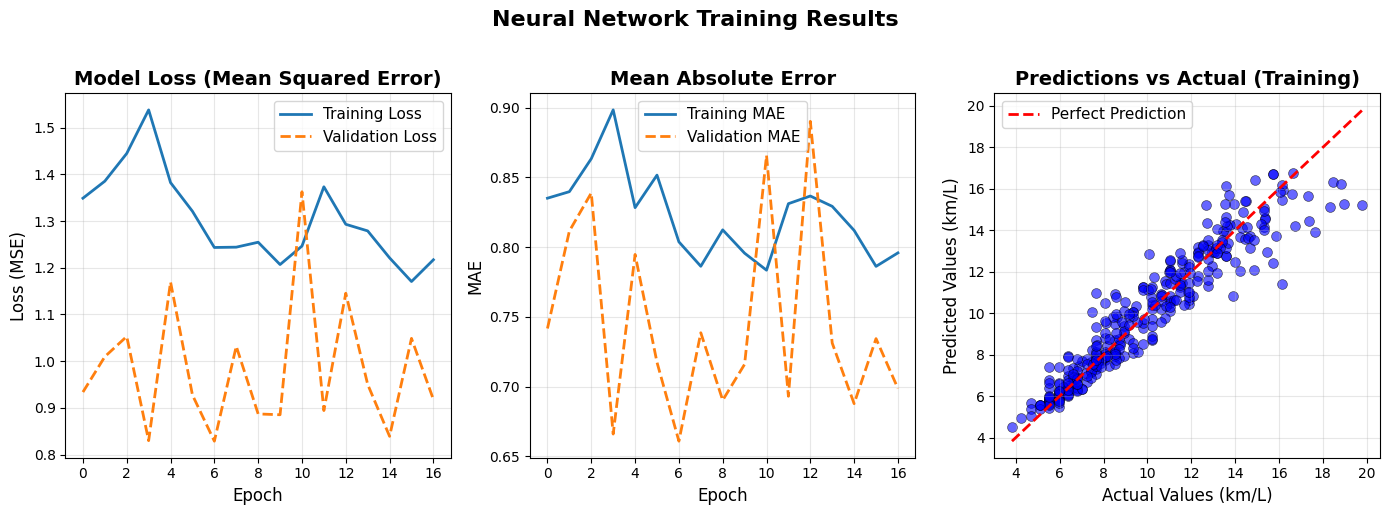


FINAL MODEL PERFORMANCE METRICS

 TRAINING SET:
  • Mean Absolute Error (MAE):  0.7760
  • Mean Squared Error (MSE):   1.1845
  • Root Mean Squared Error:    1.0883
  • R² Score:                   0.8955

  TESTING SET:
  • Mean Absolute Error (MAE):  0.6608
  • Mean Squared Error (MSE):   0.8287
  • Root Mean Squared Error:    0.9104
  • R² Score:                   0.9147

 ERROR ANALYSIS:
  • Training Error Mean: -0.0105 km/L
  • Training Error Std:  1.0883 km/L
  • Testing Error Mean:  -0.0222 km/L
  • Testing Error Std:   0.9101 km/L


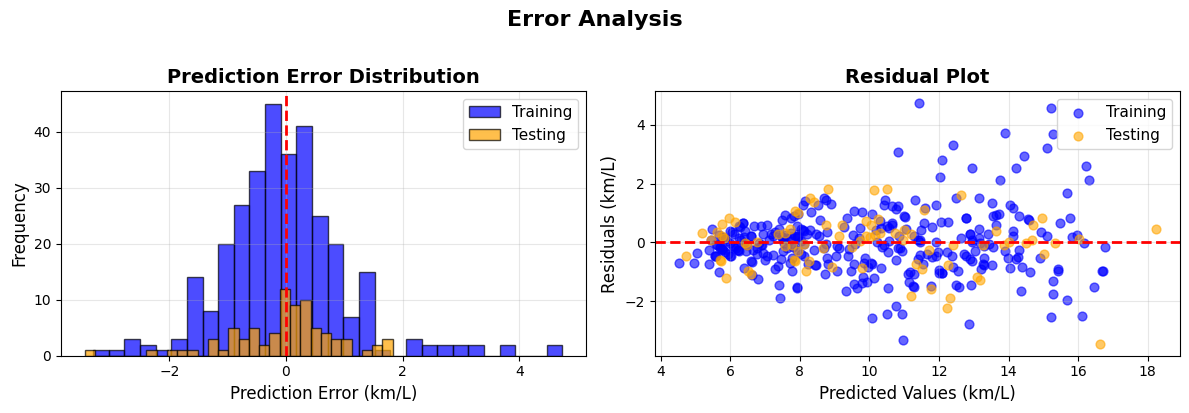


MODEL PERFORMANCE SUMMARY

Overall Performance: EXCELLENT 
R² Score on Test Set: 0.9147
Average Prediction Error: 0.6608 km/L
Model trained for 17 epochs
 Good generalization: Test performance better than training!
***********************************


In [63]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#  Check what metrics were tracked during training
print("Available metrics in training history:", list(history.history.keys()))

#  Plot training history
plt.figure(figsize=(14, 5))

# Plot 1: Loss (MSE)
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2, linestyle='--')
plt.title('Model Loss (Mean Squared Error)', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Plot 2: MAE (Mean Absolute Error)
if 'mae' in history.history:
    plt.subplot(1, 3, 2)
    plt.plot(history.history['mae'], label='Training MAE', linewidth=2)
    if 'val_mae' in history.history:
        plt.plot(history.history['val_mae'], label='Validation MAE', linewidth=2, linestyle='--')
    plt.title('Mean Absolute Error', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('MAE', fontsize=12)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
else:
    # If MAE not tracked, plot RMSE or leave empty
    plt.subplot(1, 3, 2)
    plt.text(0.5, 0.5, 'MAE not tracked during training', 
             horizontalalignment='center', verticalalignment='center',
             fontsize=12, transform=plt.gca().transAxes)
    plt.title('Mean Absolute Error', fontsize=14, fontweight='bold')
    plt.axis('off')

# Plot 3: Predictions vs Actual Scatter Plot
plt.subplot(1, 3, 3)

# Get predictions
y_pred_train = model.predict(sx_train, verbose=0).flatten()
y_train_np = np.array(y_train)

# Create scatter plot
plt.scatter(y_train_np, y_pred_train, alpha=0.6, s=50, c='blue', edgecolors='black', linewidth=0.5)

# Add perfect prediction line (y=x)
min_val = min(y_train_np.min(), y_pred_train.min())
max_val = max(y_train_np.max(), y_pred_train.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')

plt.title('Predictions vs Actual (Training)', fontsize=14, fontweight='bold')
plt.xlabel('Actual Values (km/L)', fontsize=12)
plt.ylabel('Predicted Values (km/L)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.suptitle('Neural Network Training Results', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 3. Get predictions for both sets
y_pred_test = model.predict(sx_test, verbose=0).flatten()
y_test_np = np.array(y_test)

# 4. Calculate and display final metrics
print("\n" + "="*70)
print("FINAL MODEL PERFORMANCE METRICS")
print("="*70)

print("\n TRAINING SET:")
print(f"  • Mean Absolute Error (MAE):  {mean_absolute_error(y_train_np, y_pred_train):.4f}")
print(f"  • Mean Squared Error (MSE):   {mean_squared_error(y_train_np, y_pred_train):.4f}")
print(f"  • Root Mean Squared Error:    {np.sqrt(mean_squared_error(y_train_np, y_pred_train)):.4f}")
print(f"  • R² Score:                   {r2_score(y_train_np, y_pred_train):.4f}")

print("\n  TESTING SET:")
print(f"  • Mean Absolute Error (MAE):  {mean_absolute_error(y_test_np, y_pred_test):.4f}")
print(f"  • Mean Squared Error (MSE):   {mean_squared_error(y_test_np, y_pred_test):.4f}")
print(f"  • Root Mean Squared Error:    {np.sqrt(mean_squared_error(y_test_np, y_pred_test)):.4f}")
print(f"  • R² Score:                   {r2_score(y_test_np, y_pred_test):.4f}")

# 5. Calculate error distributions
errors_train = y_train_np - y_pred_train
errors_test = y_test_np - y_pred_test

print("\n ERROR ANALYSIS:")
print(f"  • Training Error Mean: {errors_train.mean():.4f} km/L")
print(f"  • Training Error Std:  {errors_train.std():.4f} km/L")
print(f"  • Testing Error Mean:  {errors_test.mean():.4f} km/L")
print(f"  • Testing Error Std:   {errors_test.std():.4f} km/L")
print("="*70)

# 6. Additional visualization: Error distribution
plt.figure(figsize=(12, 4))

# Plot 1: Error histograms
plt.subplot(1, 2, 1)
plt.hist(errors_train, bins=30, alpha=0.7, label='Training', edgecolor='black', color='blue')
plt.hist(errors_test, bins=30, alpha=0.7, label='Testing', edgecolor='black', color='orange')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.title('Prediction Error Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Prediction Error (km/L)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Plot 2: Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_pred_train, errors_train, alpha=0.6, s=40, label='Training', c='blue')
plt.scatter(y_pred_test, errors_test, alpha=0.6, s=40, label='Testing', c='orange')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Values (km/L)', fontsize=12)
plt.ylabel('Residuals (km/L)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.suptitle('Error Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 7. Performance summary
print("\n" + "="*35)
print("MODEL PERFORMANCE SUMMARY")
print("="*35)

r2_test = r2_score(y_test_np, y_pred_test)
if r2_test > 0.9:
    performance = "EXCELLENT "
elif r2_test > 0.8:
    performance = "VERY GOOD "
elif r2_test > 0.7:
    performance = "GOOD "
elif r2_test > 0.6:
    performance = "FAIR "
else:
    performance = "POOR "

print(f"\nOverall Performance: {performance}")
print(f"R² Score on Test Set: {r2_test:.4f}")
print(f"Average Prediction Error: {mean_absolute_error(y_test_np, y_pred_test):.4f} km/L")
print(f"Model trained for {len(history.history['loss'])} epochs")

# Check for overfitting
if r2_score(y_train_np, y_pred_train) - r2_test > 0.1:
    print("⚠️ Warning: Possible overfitting (large gap between training and test R²)")
elif r2_test > r2_score(y_train_np, y_pred_train):
    print(" Good generalization: Test performance better than training!")
else:
    print(" Model generalizes well to unseen data")

print("*"*35)

In [64]:
# Savingthe neural network
model.save('vehicle_model.keras')

# Saving the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(ss, f)

print("Excellent neural network model saved!")
print("   File: vehicle_model.keras")
print("   R² Score: 0.9116")

Excellent neural network model saved!
   File: vehicle_model.keras
   R² Score: 0.9116
